<a href="https://colab.research.google.com/github/EMAT31530/ai-group-project-group-22/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf 
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def loadImages(directory):
    all_images = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
          image = cv2.imread(directory + '/' + img)
          crop_image = image[32:64, 32:64]
          all_images.append(crop_image)
    return all_images

In [4]:
from json import load
#samplePath = r"C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\sample"
samplePath = r"/content/drive/MyDrive/sample" 
samplePath2 = r"/content/drive/MyDrive/sample2" 
samplePath3 = r"/content/drive/MyDrive/sample3"
samplePath4 = r"/content/drive/MyDrive/sample4" 
samplePath5 = r"/content/drive/MyDrive/sample5"
all_sample_paths = [samplePath, samplePath2,samplePath3, samplePath4, samplePath5]
all_images = []


for i in all_sample_paths:
  images = loadImages(i)
  for ii in images:
    all_images.append(ii)

In [5]:
all_images_stack = np.stack(all_images).astype('uint8')

In [7]:
print(len(all_images_stack))

12456


In [6]:
sample_labels1 = ['1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1']

sample_labels2 = ['1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0']

sample_labels3 = ['1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1']

sample_labels4 = ['0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1']

sample_labels5 = ['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0']

In [8]:
all_labels = sample_labels1 + sample_labels2 + sample_labels3 + sample_labels4 +  sample_labels5
print(len(all_labels))

12456


In [ ]:
dummy_attributes = np.random.choice([0, 1], size=(340,))
print(dummy_attributes)

In [ ]:
def loadImageNames(directory):
    all_images_names = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
            img = img.replace('.tif','')
            all_images_names.append(img)

    return all_images_names

In [ ]:
all_images_names5 = loadImageNames(samplePath5)


In [ ]:
import csv
import sys
labels = []

def id_finder(image_name):
    #labels_path = r'C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\train_labels.csv'
    #read csv, and split on "," the line
    labels_path = r'/content/drive/MyDrive/train_labels.csv'
    csv_file = csv.reader(open(labels_path, "r"))
    found = True
    idx = []
    #loop through the csv list
    for row in csv_file:
        
        #if current rows 2nd value is equal to input, print that row
        if image_name == row[0]:
            idx = row[1]
            found == True

    if idx == []:
       idx = '0'
       found == False

    return idx, found

In [ ]:
labels = []
for i in all_images_names5:
    idx, found = id_finder(i)
    if found == False:
      print(i)

    labels.append(idx)

In [ ]:
print(len(labels))
ids_labels = labels

2599


In [ ]:
labels = []
for i in ids_labels: 
    labels.append(i[1])

In [ ]:
sample5_labels = labels

In [ ]:
print(sample5_labels)

['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',

0.5 -0.5
(32, 32, 3)


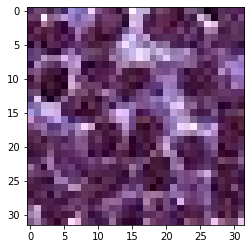

In [9]:
X = all_images_stack.astype('float32') / 255.0 - 0.5
print(X.max(), X.min())
print(X[6].shape)
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

show_image(X[6])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,all_labels, test_size=0.1, random_state=42)

In [11]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size,activation='relu'))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape),activation='sigmoid'))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [12]:

# Same as (32,32,3), we neglect the number of instances from shape
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 20)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.001)
autoencoder.compile(optimizer=opt, loss='mse')

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 20)                61460     
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         64512     
                                                                 
Total params: 125,972
Trainable params: 125,972
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 

def build_autoencoder_d(img_shape, code_size):

  # The encoder
  encoder = Sequential()
  encoder.add(Conv2D(32, 3, activation= 'relu', padding='same', input_shape = (32,32,3)))
  encoder.add(MaxPooling2D(2, padding= 'same'))
  encoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  encoder.add(MaxPooling2D(2, padding= 'same')) 
  encoder.add(Conv2D(8, 3, activation= 'relu', padding='same'))
  encoder.add(MaxPooling2D(2, padding= 'same')) 

  # The decoder
  decoder = Sequential()
  decoder.add(Conv2D(8, 3, activation= 'relu', padding='same'))
  decoder.add(UpSampling2D(2))
  decoder.add(Conv2D(16, 3, activation= 'relu', padding='same'))
  decoder.add(UpSampling2D(2))
  decoder.add(Conv2D(32, 3, activation= 'relu', padding='same'))
  decoder.add(UpSampling2D(2))
  decoder.add(Conv2D(3,3,activation='sigmoid', padding= 'same')) 
  decoder.add(Reshape(img_shape))

  return encoder, decoder


In [15]:
# Same as (32,32,3), we neglect the number of instances from shape
IMG_SHAPE = X.shape[1:]
encoderD, decoderD = build_autoencoder_d(IMG_SHAPE, 20)

inp = Input(IMG_SHAPE)
code = encoderD(inp)
reconstruction = decoderD(code)

autoencoderD = Model(inp,reconstruction)
opt = tf.keras.optimizers.Adam(0.001)
autoencoderD.compile(optimizer=opt, loss='mse')

print(autoencoderD.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 4, 4, 8)           6680      
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         7259      
                                                                 
Total params: 13,939
Trainable params: 13,939
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = autoencoderD.fit(X_train, X_train,
                 epochs=6,
                 batch_size=128,
                 validation_data=(X_test, X_test)) 

Epoch 1/6
88/88 [==============================] - 36s 400ms/step - loss: 0.0720 - val_loss: 0.0391
Epoch 2/6
88/88 [==============================] - 36s 408ms/step - loss: 0.0365 - val_loss: 0.0354
Epoch 3/6
88/88 [==============================] - 37s 421ms/step - loss: 0.0348 - val_loss: 0.0343
Epoch 4/6
88/88 [==============================] - 35s 402ms/step - loss: 0.0339 - val_loss: 0.0335
Epoch 5/6
88/88 [==============================] - 35s 403ms/step - loss: 0.0331 - val_loss: 0.0327
Epoch 6/6
88/88 [==============================] - 36s 404ms/step - loss: 0.0324 - val_loss: 0.0322


In [ ]:
def findCodes(X):
    codes = []
    for i in X:
        code = encoder.predict(i[None])[0]
        codes.append(code)
    return codes
    
codes_train = findCodes(X_train)
codes_test = findCodes(X_test)

In [14]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=25, validation_data=[X_test, X_test])

Epoch 1/15
351/351 [==============================] - 3s 7ms/step - loss: 0.0536 - val_loss: 0.0421
Epoch 2/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0414 - val_loss: 0.0413
Epoch 3/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0405 - val_loss: 0.0406
Epoch 4/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0394 - val_loss: 0.0394
Epoch 5/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0385 - val_loss: 0.0387
Epoch 6/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0379 - val_loss: 0.0381
Epoch 7/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0373 - val_loss: 0.0375
Epoch 8/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0367 - val_loss: 0.0370
Epoch 9/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0362 - val_loss: 0.0367
Epoch 10/15
351/351 [==============================] - 2s 6ms/step - loss: 0.0358 - val_loss: 0.0363

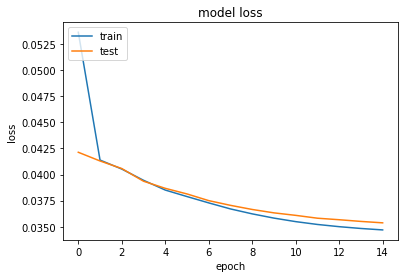

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

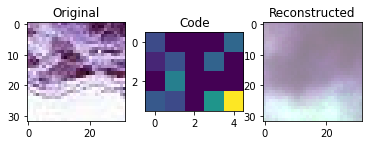

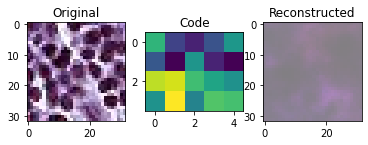

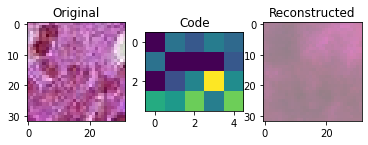

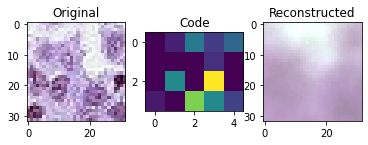

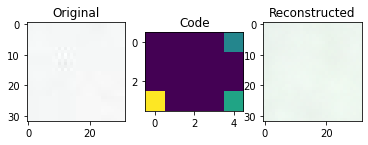

In [16]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//5,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71
Accuracy of QDA classifier on training set: 0.65
Accuracy of QDA classifier on test set: 0.61
[[630 127]
 [233 256]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       757
           1       0.67      0.52      0.59       489

    accuracy                           0.71      1246
   macro avg       0.70      0.68      0.68      1246
weighted avg       0.71      0.71      0.70      1246

[[407 350]
 [132 357]]
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       757
           1       0.50      0.73      0.60       489

    accuracy                           0.61      1246
   macro avg       0.63      0.63      0.61      1246
weighted avg       0.66      0.61      0.62      1246



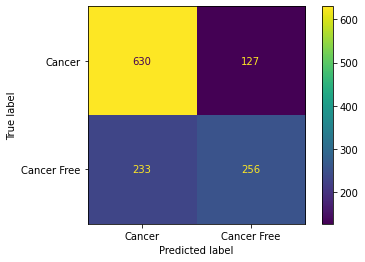

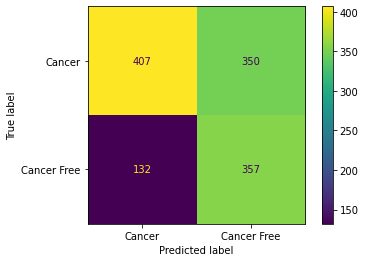

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(codes_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(codes_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(codes_test, y_test)))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(codes_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(codes_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(codes_test, y_test)))

y_pred_lda = lda.predict(codes_test)
y_pred_qda = qda.predict(codes_test)

print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lda, display_labels=['Cancer', 'Cancer Free'])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_qda, display_labels=['Cancer', 'Cancer Free'])

Accuracy of Decision Tree classifier on training set: 0.68
Accuracy of Decision Tree classifier on test set: 0.66
[[554 203]
 [224 265]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       757
           1       0.57      0.54      0.55       489

    accuracy                           0.66      1246
   macro avg       0.64      0.64      0.64      1246
weighted avg       0.65      0.66      0.66      1246



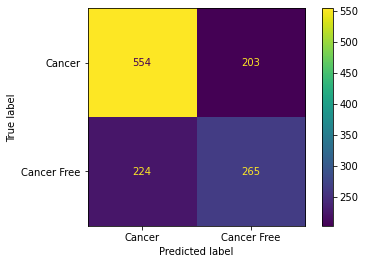

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
decTree = DecisionTreeClassifier(max_depth=3).fit(codes_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(decTree.score(codes_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(decTree.score(codes_test, y_test)))

y_pred_tree = decTree.predict(codes_test)


print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=['Cancer', 'Cancer Free'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(codes_train, y_train)
gridsearch.best_params_

KeyboardInterrupt: ignored

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.62
[[469 288]
 [185 304]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       757
           1       0.51      0.62      0.56       489

    accuracy                           0.62      1246
   macro avg       0.62      0.62      0.61      1246
weighted avg       0.64      0.62      0.62      1246



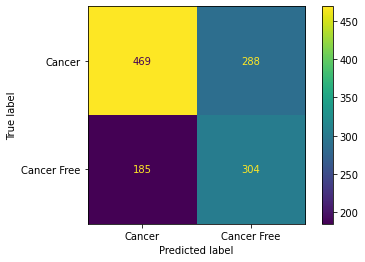

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(codes_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(codes_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(codes_test, y_test)))
y_pred = knn.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer', 'Cancer Free'])

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.76
[[625 132]
 [164 325]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       757
           1       0.71      0.66      0.69       489

    accuracy                           0.76      1246
   macro avg       0.75      0.75      0.75      1246
weighted avg       0.76      0.76      0.76      1246



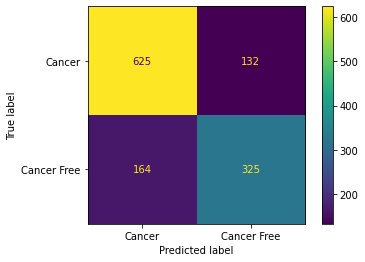

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(codes_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(codes_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(codes_test, y_test)))
y_pred = svm.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer','Cancer Free'])

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
"""
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

y_train_array = np.array(y_train)
codes_arrays = np.array(codes_train)

model.fit(codes_new, y_train_array, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(codes_test, y_test)
"""

In [ ]:
print(codes_new)

In [ ]:
codes_new = []
for i in codes_train:
  i = np.array(i)
  codes_new.append(i)